<center><h2> Module 3 Project</h2></center>
<center><h2> Hypothesis Testing</h2></center>

**Authors:**

#### Business Problem

Is there a relationship between the age of a player and the minutes that the player plays?

    * $H_0$: There is no relationship between a player's age and the minutes that a player plays in a season.
    * $H_1$: A player is significantly more likely to play more minutes if they are older.

#### Analysis

In [1]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import scipy.stats as stats
import functions as fn
print(fn.__file__)


/Users/flatironschool/Desktop/InesaLisnic/mod3project/functions.py


In [2]:
# importing dataframe with age and minutes per match columns
age_min=pd.read_csv('football_players_age_and_minutes.csv')
age_min.head()

,age,min_per_match
0,28,90
1,29,74
2,25,87
3,24,89
4,25,53


In [3]:
# computing the players age mean
age_mean=round(age_min['age'].mean(),0)

In [4]:
# creating a new column with the categorized values 0 and 1 which means young and old respectively
age_min['age_category']=age_min['age'].apply(lambda x: 1 if x >= age_mean else 0 )
age_min.head()

,age,min_per_match,age_category
0,28,90,1
1,29,74,1
2,25,87,0
3,24,89,0
4,25,53,0


In [5]:
# counting the young and old players, which signify the populations of young and old players
old=age_min.loc[age_min['age_category']==1]
young=age_min.loc[age_min['age_category']==0]
print(len(old), len(young))

284 216


In [6]:
# sampling an equal size of samples from both the young and old populations
sample_old_min=fn.sampling_selecting(old, 100, 'min_per_match')
sample_young_min=fn.sampling_selecting(young, 100, 'min_per_match')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The frequency of played minutes by old and young players')

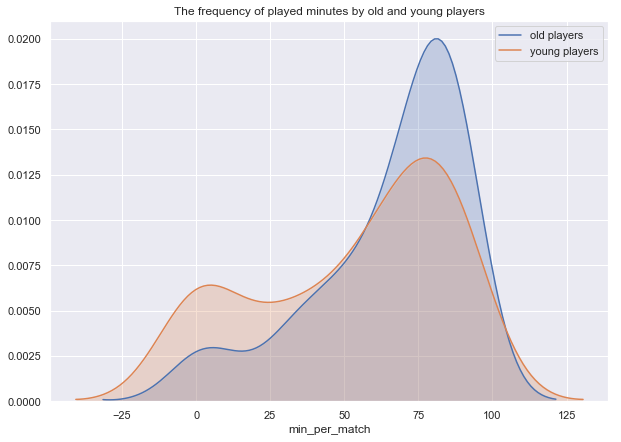

In [48]:
# ploting the graphs of samples distributions
sns.distplot(sample_old_min, hist=False, kde_kws={"shade": True}, label='old players')
sns.distplot(sample_young_min, hist=False, kde_kws={"shade": True}, label='young players')
plt.legend()
plt.title('The frequency of played minutes by old and young players')

Above we have the distributions for young and old players based on minutes played per match.
We assume that the sample mean of older players is bigger than the sample mean for younger players.
Considering the same variancy and size of the samples, we will use the Two samples T-test in order to verify the probability of random occurence in these samples. 

In [57]:
tt_results1=stats.ttest_ind(sample_old_min, sample_young_min)
tt_results1

Ttest_indResult(statistic=2.979059013158594, pvalue=0.003272078540836404)

In [58]:
t1 = tt_results1.statistic
t1

2.979059013158594

In [59]:
df1=fn.welch_dof(sample_young_min,sample_old_min)
df1

188.3788044402658

In [11]:
t_critical1=1.653

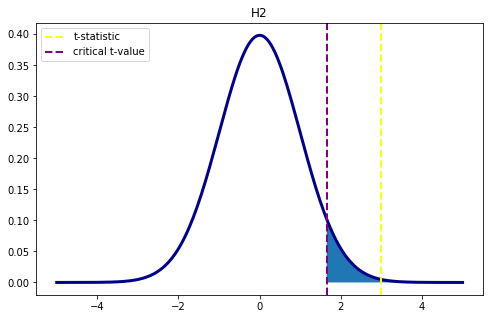

In [12]:
fn.make_t_dist(t1, t_critical1, df1, 'H2')

In [14]:
fn.Cohen_d(sample_old_min, sample_young_min)

0.42130256595186927

In [18]:
national_performance=pd.read_csv('football_players_by_nationality_and_goals.csv')
national_performance.head()

,nationality,goals_overall,position
0,Spain,0,Goalkeeper
1,Italy,0,Defender
2,Sweden,1,Defender
3,England,1,Defender
4,Côte d'Ivoire,0,Defender


In [19]:
national=national_performance.loc[national_performance['nationality']=='England']
national_pos=national.loc[(national['position']=='Midfielder')|(national['position']=='Forward')]
foreign=national_performance.loc[national_performance['nationality']!='England']
foreign_pos=foreign.loc[(foreign['position']=='Midfielder')|(foreign['position']=='Forward')]

In [20]:
print(len(national_pos), len(foreign_pos))

90 186


In [25]:
sample_nat_goals=fn.sampling_selecting(national_pos, 60, 'goals_overall')
sample_for_goals=fn.sampling_selecting(foreign_pos, 60, 'goals_overall')

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The frequency of goals from english and foreign players')

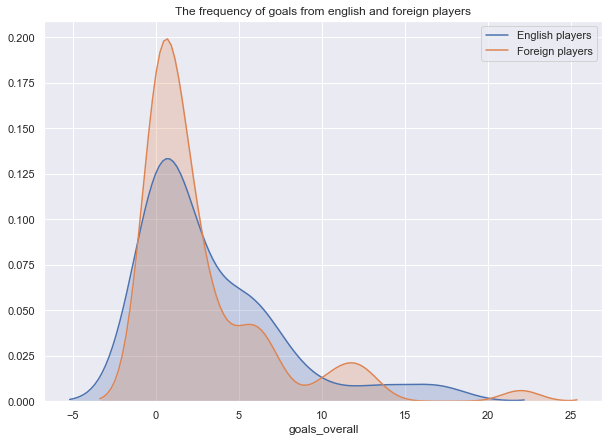

In [49]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,7)})
sns.distplot(sample_nat_goals, hist=False, kde_kws={"shade": True}, label='English players')
sns.distplot(sample_for_goals, hist=False, kde_kws={"shade": True}, label='Foreign players') 
plt.legend()
plt.title('The frequency of goals from english and foreign players')

In [27]:
tt_results = stats.ttest_ind(sample_nat_goals, sample_for_goals, equal_var=False)

In [28]:
t = tt_results.statistic

In [30]:
df = fn.welch_dof(sample_nat_goals,sample_for_goals)

In [31]:
t_critical = 1.658

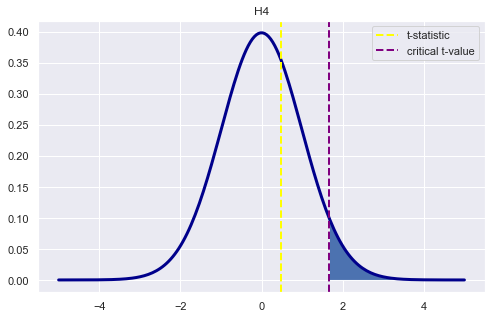

In [32]:
fn.make_t_dist(t, t_critical, df, 'H4')

In [34]:
fn.Cohen_d(sample_for_goals, sample_nat_goals)

-0.08705906270078691

#### Findings & Application

#### Limitations

#### Next Steps